In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
import time

C:\Users\rohit\AppData\Local\Temp\ipykernel_7512\1839534538.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [279]:
df = pd.read_csv('zomato_data.csv')
df

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6 /5,27,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,No,No,NaN,0,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,No,No,NaN,0,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,No,Yes,4.3 /5,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [281]:
data_zomato = df.copy()
data_zomato.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [283]:
data_zomato.online_order.isnull().sum()

0

In [285]:
data_zomato.online_order.unique()

array(['Yes', 'No'], dtype=object)

In [287]:
data_zomato.book_table.isnull().sum()

0

In [289]:
data_zomato.book_table.unique()

array(['Yes', 'No'], dtype=object)

In [291]:
data_zomato.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [293]:
data_zomato[data_zomato['rate'].isin(['NEW', '-', np.nan])].shape[0]

10052

In [295]:
data_zomato[['rate']].dtypes

rate    object
dtype: object

**Step 1: Rating Column (rate)**

In [297]:
data_zomato['rate'].replace('-', np.nan, inplace=True)

C:\Users\rohit\AppData\Local\Temp\ipykernel_7512\449209393.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_zomato['rate'].replace('-', np.nan, inplace=True)


In [299]:
# Removing '/5' and extract the numeric part
data_zomato['rate'] = data_zomato['rate'].astype(str).str.extract(r'(\d+\.\d+)', expand=False)

In [301]:
# Converting rate to float using pd.to_numeric()
data_zomato['rate'] = pd.to_numeric(data_zomato['rate'], errors='coerce')

In [303]:
print(f"Missing values before filling: {data_zomato['rate'].isnull().sum()}")

Missing values before filling: 10052


In [305]:
# Filliing missing values using the median rating
median_rating = data_zomato['rate'].median()
data_zomato['rate'].fillna(median_rating, inplace=True)

C:\Users\rohit\AppData\Local\Temp\ipykernel_7512\4139250994.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_zomato['rate'].fillna(median_rating, inplace=True)


In [307]:
data_zomato['rate'].isnull().sum()

0

**Step 2: Cost Column (approx_costfor_two_people)**

In [309]:
# Removing commas from numeric strings ('1,000' → '1000')
data_zomato['approx_costfor_two_people'] = data_zomato['approx_costfor_two_people'].astype(str).str.replace(',', '', regex=True)

In [311]:
# Converting to numeric
data_zomato['approx_costfor_two_people'] = pd.to_numeric(data_zomato['approx_costfor_two_people'], errors='coerce')

In [313]:
data_zomato['approx_costfor_two_people'].dtype

dtype('float64')

In [315]:
# Filling missing values using the median cost
median_cost = data_zomato['approx_costfor_two_people'].median()
data_zomato['approx_costfor_two_people'].fillna(median_cost, inplace = True)

C:\Users\rohit\AppData\Local\Temp\ipykernel_7512\3922111410.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_zomato['approx_costfor_two_people'].fillna(median_cost, inplace = True)


In [317]:
data_zomato['approx_costfor_two_people'].isnull().sum()

0

**Step 3: Categorical Columns**

In [319]:
# dish_liked → Replace NaN with "Not Available"
data_zomato['dish_liked'] = data_zomato['dish_liked'].fillna("Not Available")

In [321]:
data_zomato['dish_liked'].isnull().sum()

0

In [323]:
# cuisines → Replace NaN with "Other"
data_zomato['cuisines'] = data_zomato['cuisines'].fillna("Not Available")

In [325]:
data_zomato['cuisines'].isnull().sum()

0

In [327]:
# rest_type → Replace NaN with "Unknown"
data_zomato['rest_type'] = data_zomato['rest_type'].fillna("Unknown")

In [329]:
data_zomato['rest_type'].isnull().sum()

0

**Step 4: Votes Column**

In [247]:
# # Fill missing values in votes with median
# median_votes = data_zomato['votes'].median()
# data_zomato['votes'] = data_zomato['votes'].replace(0, median_votes)

**Step 5: Binary Encoding**

Convert the following binary fields:

Column     --      Mapping

online_order -- Yes → 1, No → 0

book_table -- Yes → 1, No → 0



In [331]:
data_zomato['online_order'] = data_zomato['online_order'].replace({'Yes':1, 'No':0})
data_zomato['book_table'] = data_zomato['book_table'].replace({'Yes':1, 'No':0})

C:\Users\rohit\AppData\Local\Temp\ipykernel_7512\2293027133.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_zomato['online_order'] = data_zomato['online_order'].replace({'Yes':1, 'No':0})
C:\Users\rohit\AppData\Local\Temp\ipykernel_7512\2293027133.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_zomato['book_table'] = data_zomato['book_table'].replace({'Yes':1, 'No':0})


**Step 6: Data Type Conversion**

Ensure the following conversions:

rate → float

votes → integer

approx_costfor_two_people → integer

In [333]:
data_zomato['rate'].dtype

dtype('float64')

In [335]:
data_zomato['votes'].dtype

dtype('int64')

In [337]:
data_zomato['approx_costfor_two_people'].dtype

dtype('float64')

In [339]:
data_zomato['approx_costfor_two_people'] = data_zomato['approx_costfor_two_people'].astype(int)

In [341]:
data_zomato['approx_costfor_two_people'].dtype

dtype('int32')

## Exploratory Data Analysis

In [343]:
data_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 3.7+ MB


In [345]:
data_zomato.describe()

,online_order,book_table,rate,votes,approx_costfor_two_people
count,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000
mean,0.588665,0.124698,3.700362,283.697527,554.391689
std,0.492080,0.330379,0.395391,803.838853,437.563723
min,0.000000,0.000000,1.800000,0.000000,40.000000
25%,0.000000,0.000000,3.500000,7.000000,300.000000
50%,1.000000,0.000000,3.700000,41.000000,400.000000
75%,1.000000,0.000000,3.900000,198.000000,650.000000
max,1.000000,1.000000,4.900000,16832.000000,6000.000000


In [347]:
data_zomato.describe(include='O')

,rest_type,dish_liked,cuisines,listed_intype,listed_incity
count,51717,51717,51717,51717,51717
unique,94,5272,2724,7,30
top,Quick Bites,Not Available,North Indian,Delivery,BTM
freq,19132,28078,2913,25942,3279


In [349]:
data_zomato.duplicated().sum()

957

In [351]:
data_zomato.drop_duplicates(inplace=True)

In [353]:
data_zomato.duplicated().sum()

0

In [355]:
data_zomato.isnull().sum() / len(data_zomato) * 100

online_order                 0.0
book_table                   0.0
rate                         0.0
votes                        0.0
rest_type                    0.0
dish_liked                   0.0
cuisines                     0.0
approx_costfor_two_people    0.0
listed_intype                0.0
listed_incity                0.0
dtype: float64

## Uni-Variate Analysis

In [415]:
data_zomato.select_dtypes(['number']).columns

Index(['online_order', 'book_table', 'rate', 'votes',
       'approx_costfor_two_people'],
      dtype='object')

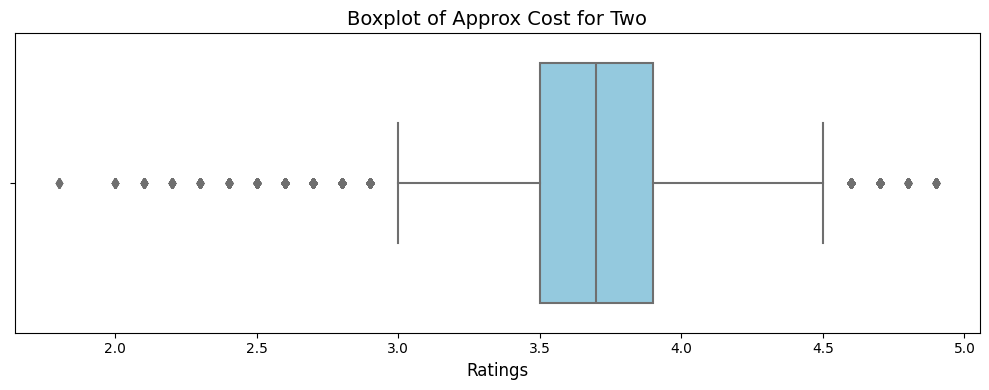

In [448]:
plt.figure(figsize=(10, 4)) 
sns.boxplot(x=data_zomato['rate'], color='skyblue')
plt.title("Boxplot of Approx Cost for Two", fontsize=14)
plt.xlabel("Ratings", fontsize=12)
plt.tight_layout()
plt.show()

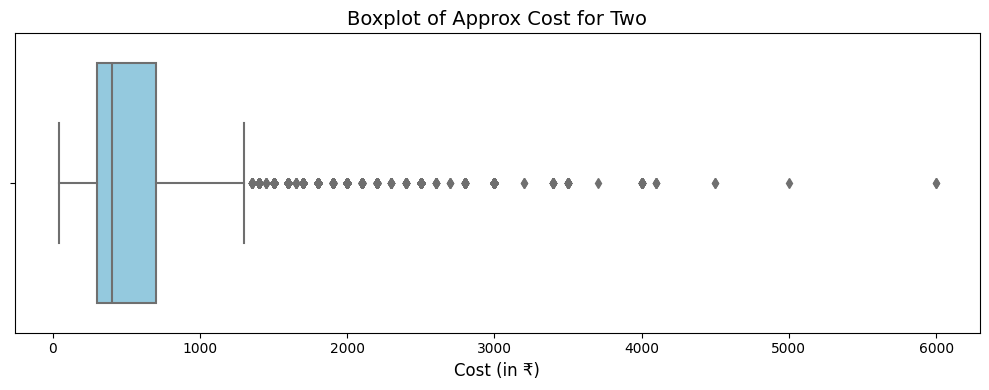

In [444]:
plt.figure(figsize=(10, 4)) 
sns.boxplot(x=data_zomato['approx_costfor_two_people'], color='skyblue')
plt.title("Boxplot of Approx Cost for Two", fontsize=14)
plt.xlabel("Cost (in ₹)", fontsize=12)
plt.tight_layout()
plt.show()

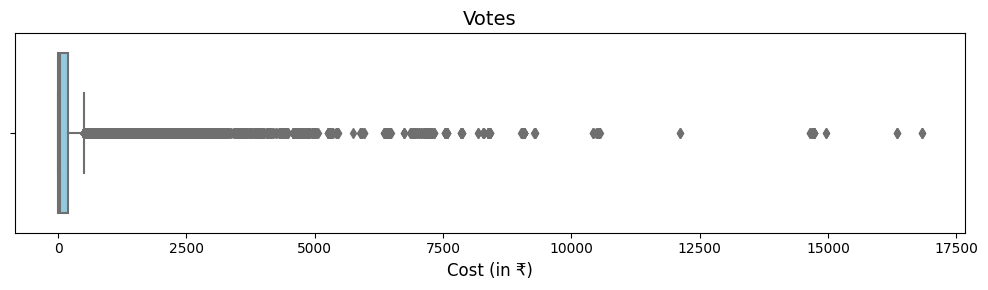

In [452]:
plt.figure(figsize=(10, 3)) 
sns.boxplot(x=data_zomato['votes'], color='skyblue')
plt.title("Votes", fontsize=14)
plt.xlabel("Cost (in ₹)", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# As there are many outliers 

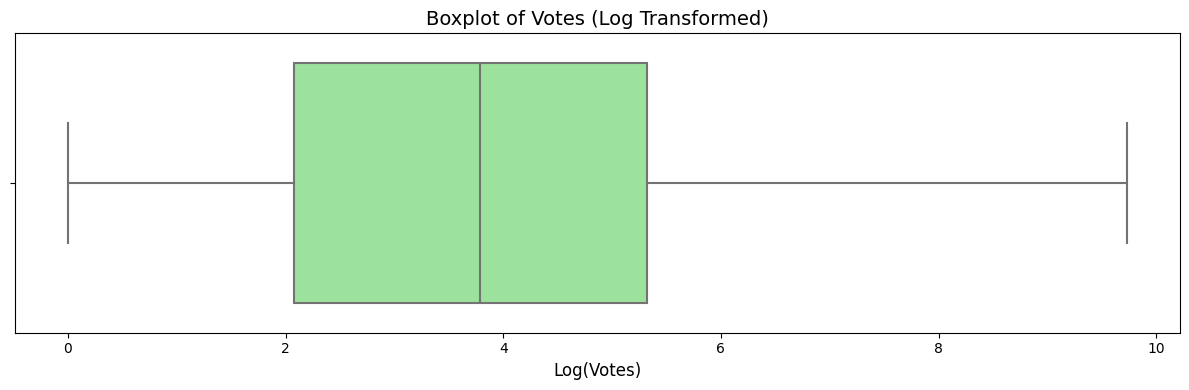

In [454]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=np.log1p(data_zomato['votes']), color='lightgreen')
plt.title("Boxplot of Votes (Log Transformed)", fontsize=14)
plt.xlabel("Log(Votes)", fontsize=12)
plt.tight_layout()
plt.show()

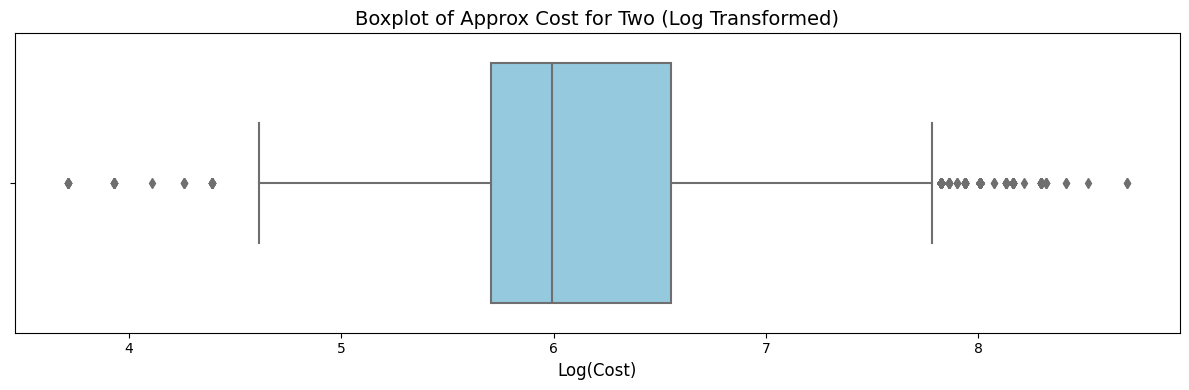

In [456]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=np.log1p(data_zomato['approx_costfor_two_people']), color='skyblue')
plt.title("Boxplot of Approx Cost for Two (Log Transformed)", fontsize=14)
plt.xlabel("Log(Cost)", fontsize=12)
plt.tight_layout()
plt.show()

In [462]:
data_zomato.select_dtypes(['object']).columns

Index(['rest_type', 'dish_liked', 'cuisines', 'listed_intype',
       'listed_incity'],
      dtype='object')

In [464]:
grouped_city = data_zomato.groupby('listed_incity', as_index=False).agg({
    'votes': 'mean',
    'rate': 'mean',
    'approx_costfor_two_people': 'mean'
}).sort_values(by='votes', ascending=False)

**1. Votes by City**

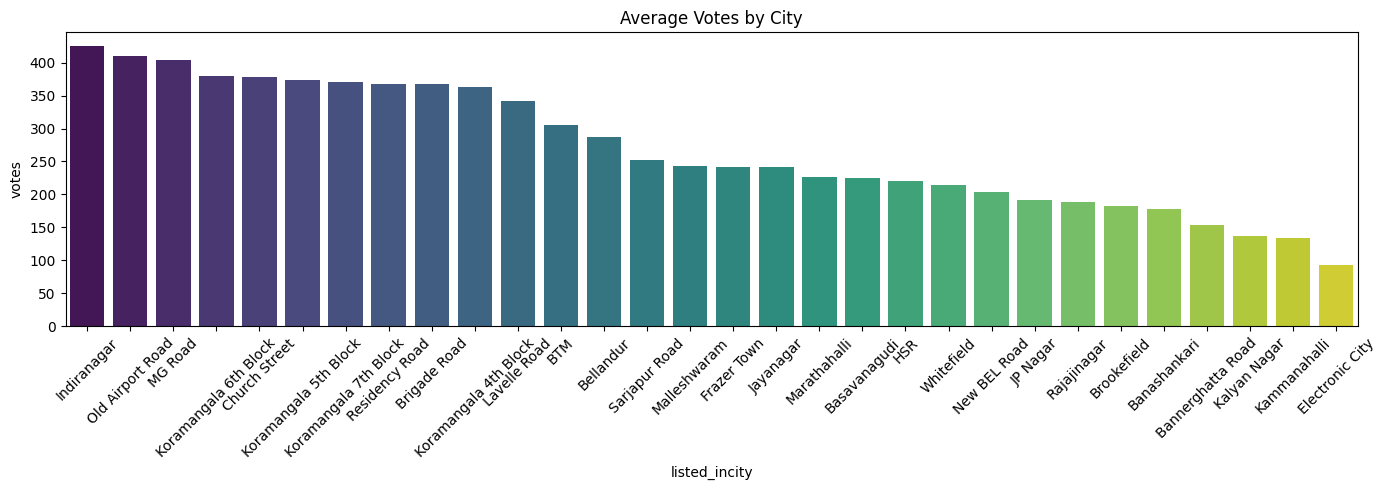

In [468]:
plt.figure(figsize=(14, 5))
sns.barplot(x='listed_incity', y='votes', data=grouped_city, palette='viridis')
plt.title("Average Votes by City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Rate by City**

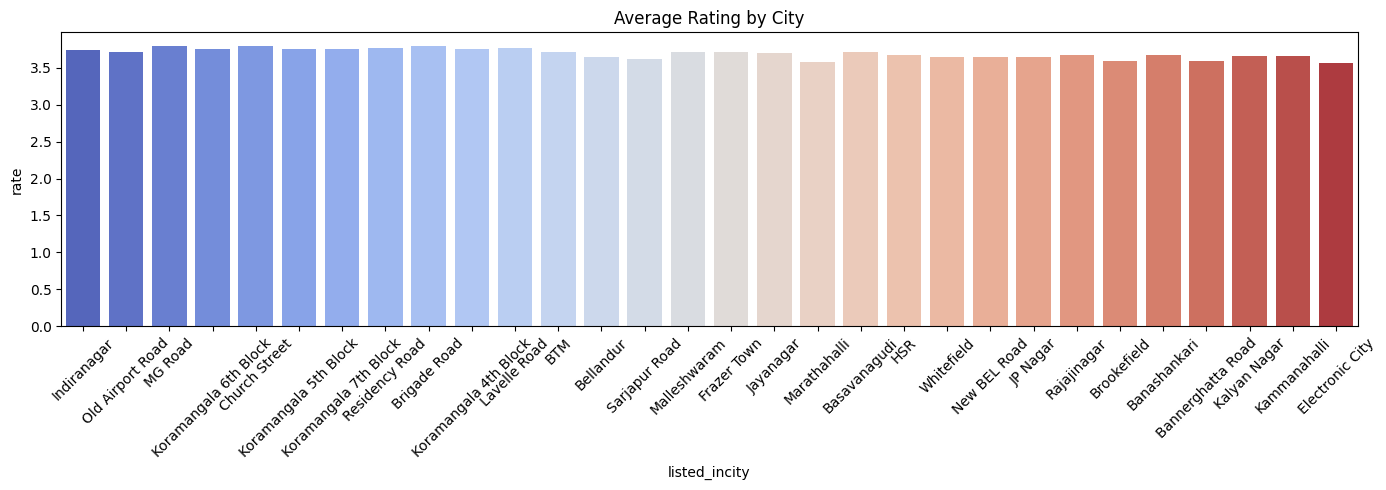

In [478]:
plt.figure(figsize=(14, 5))
sns.barplot(x='listed_incity', y='rate', data=grouped_city, palette='coolwarm')
plt.title("Average Rating by City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3. Approx Cost for Two by City**

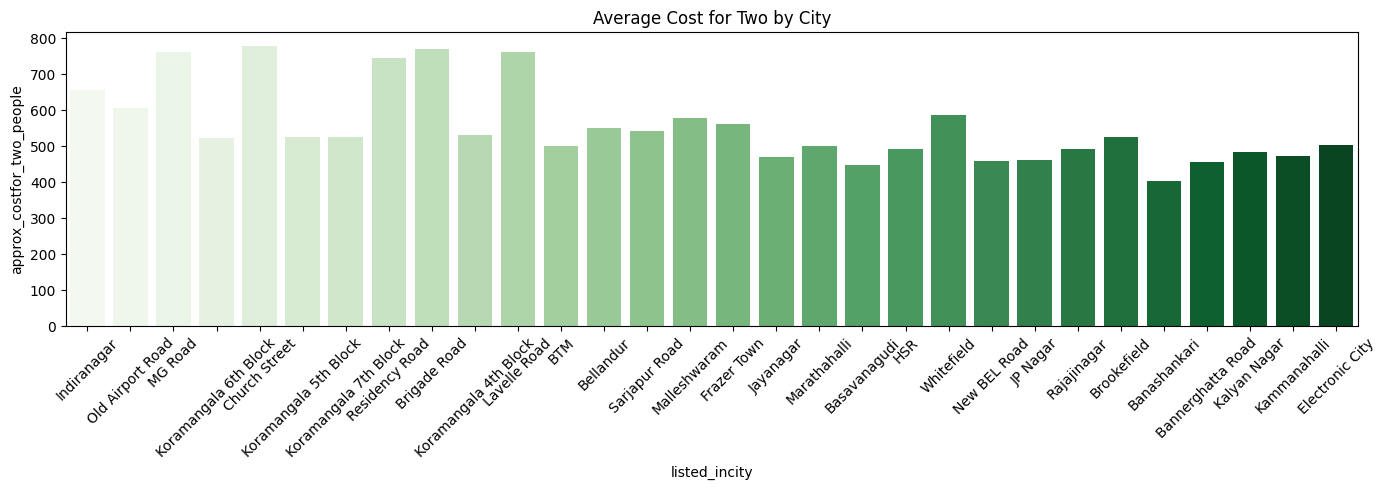

In [487]:
plt.figure(figsize=(14, 5))
sns.barplot(x='listed_incity', y='approx_costfor_two_people', data=grouped_city, palette='Greens')
plt.title("Average Cost for Two by City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Merging datasets

In [490]:
df_ = pd.read_csv('Geographical Coordinates.csv')
data_geo = df_.copy()
data_geo

,listed_incity,Latitude,Longitude
0,Banashankari,12.939333,77.553982
1,Bannerghatta Road,12.952660,77.605048
2,Basavanagudi,12.941726,77.575502
3,Bellandur,12.925352,77.675941
4,Brigade Road,12.967358,77.606435
5,Brookefield,12.963814,77.722437
6,BTM,12.916360,77.604733
7,Church Street,12.974914,77.605247
8,Electronic City,12.848760,77.648253
9,Frazer Town,12.998683,77.615525


In [492]:
data_merged = pd.merge(data_zomato, data_geo, on='listed_incity', how='left')
data_merged

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,log_votes,Latitude,Longitude
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,6.654153,12.939333,77.553982
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari,6.669498,12.939333,77.553982
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari,6.823286,12.939333,77.553982
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari,4.488636,12.939333,77.553982
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari,5.117994,12.939333,77.553982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50755,0,0,3.6,27,Bar,Not Available,Continental,1500,Pubs and bars,Whitefield,3.332205,NaN,NaN
50756,0,0,3.7,0,Bar,Not Available,Finger Food,600,Pubs and bars,Whitefield,0.000000,NaN,NaN
50757,0,0,3.7,0,Bar,Not Available,Finger Food,2000,Pubs and bars,Whitefield,0.000000,NaN,NaN
50758,0,1,4.3,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,Pubs and bars,Whitefield,5.468060,NaN,NaN


In [498]:
data_merged.isnull().sum()

online_order                    0
book_table                      0
rate                            0
votes                           0
rest_type                       0
dish_liked                      0
cuisines                        0
approx_costfor_two_people       0
listed_intype                   0
listed_incity                   0
log_votes                       0
Latitude                     5459
Longitude                    5459
dtype: int64

In [500]:
data_merged.isnull().sum() / len(data_merged) * 100

online_order                  0.000000
book_table                    0.000000
rate                          0.000000
votes                         0.000000
rest_type                     0.000000
dish_liked                    0.000000
cuisines                      0.000000
approx_costfor_two_people     0.000000
listed_intype                 0.000000
listed_incity                 0.000000
log_votes                     0.000000
Latitude                     10.754531
Longitude                    10.754531
dtype: float64

In [516]:
mean_latitude = data_merged['Latitude'].mean()
data_merged['Latitude'] = data_merged['Latitude'].fillna(mean_latitude)

In [518]:
mean_longitude = data_merged['Longitude'].mean()
data_merged['Longitude'] = data_merged['Longitude'].fillna(mean_longitude)

In [520]:
data_merged.isnull().sum() / len(data_merged) * 100

online_order                 0.0
book_table                   0.0
rate                         0.0
votes                        0.0
rest_type                    0.0
dish_liked                   0.0
cuisines                     0.0
approx_costfor_two_people    0.0
listed_intype                0.0
listed_incity                0.0
log_votes                    0.0
Latitude                     0.0
Longitude                    0.0
dtype: float64

# Cuisine-Specific Map

**Step 1 - Installing folium module.**

In [522]:
! pip install folium

   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   -------------- ------------------------- 41.0/110.9 kB 1.9 MB/s eta 0:00:01
   -------------- ------------------------- 41.0/110.9 kB 1.9 MB/s eta 0:00:01
   ------------------ -------------------- 51.2/110.9 kB 372.4 kB/s eta 0:00:01
   ------------------ -------------------- 51.2/110.9 kB 372.4 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.9 kB 420.8 kB/s eta 0:00:01
   -------------------------------------- 110.9/110.9 kB 402.6 kB/s eta 0:00:00


**Step 2 - Installing IPython module.**

In [524]:
! pip install IPython

In [526]:
# Saving the DataFrame to a CSV file
data_merged.to_csv('zomato_data_final.csv', index=False)

**Step3  - Reading the csv data into a dataframe.**

In [528]:
data = pd.read_csv('zomato_data_final.csv')
data

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,log_votes,Latitude,Longitude
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,6.654153,12.939333,77.553982
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari,6.669498,12.939333,77.553982
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari,6.823286,12.939333,77.553982
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari,4.488636,12.939333,77.553982
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari,5.117994,12.939333,77.553982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50755,0,0,3.6,27,Bar,Not Available,Continental,1500,Pubs and bars,Whitefield,3.332205,12.950376,77.616323
50756,0,0,3.7,0,Bar,Not Available,Finger Food,600,Pubs and bars,Whitefield,0.000000,12.950376,77.616323
50757,0,0,3.7,0,Bar,Not Available,Finger Food,2000,Pubs and bars,Whitefield,0.000000,12.950376,77.616323
50758,0,1,4.3,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,Pubs and bars,Whitefield,5.468060,12.950376,77.616323


In [539]:
# Importing Libraries

import pandas as pd
from folium.plugins import MarkerCluster
import folium
from IPython.display import IFrame

**Step 4 - Cuisine-Specific Map – Italian Restaurants**

In [558]:
# Filter Italian cuisine restaurants
italian_df = data[data['cuisines'].str.contains("Italian", na=False)]

# Create a folium map centered around Bangalore (example coords)
map4 = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

# Add restaurant markers
for i, row in italian_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['listed_incity']}<br>Cuisine: {row['cuisines']}",
        icon=folium.Icon(color='purple')
    ).add_to(map4)

# Save the map
map4.save("italian_spots_map.html")


In [583]:
from IPython.display import IFrame

# Display the map in the notebook

IFrame('italian_spots_map.html', width=1000,height=800)

## Interactive Restaurant Density Mapping

In [574]:
# Loading data with folium map data perfroming the resutaurant density

map1 = folium.Map(location=[12.9716, 77.5946],zoom_start=12)
marker_cluster = MarkerCluster().add_to(map1)

for i, row in data.iterrows():
    if not pd.isna (row['Latitude']) and not pd.isna (row['Longitude']):
        folium.Marker(
            location= [row['Latitude'], row['Longitude']],
            popup=f"{row['listed_incity']}<br>Rating: {row['rate']}<br>Cost: ₹{row['approx_costfor_two_people']}",
        ).add_to(marker_cluster)

map1.save("restaurant_density.html")

In [581]:
from IPython.display import IFrame

#Display the map in the notebook

IFrame('restaurant_density.html', width=1000,height=800)